Analysis borrowed from lifelines documentation https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html

In [11]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

In [12]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [13]:
T = data["duration"]
E = data["observed"]

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1808 total observations, 340 right-censored observations>

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


<AxesSubplot:xlabel='timeline'>

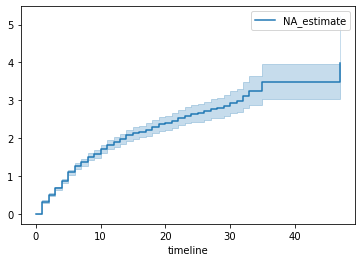

In [14]:
print(naf.cumulative_hazard_.head())
naf.plot_cumulative_hazard()

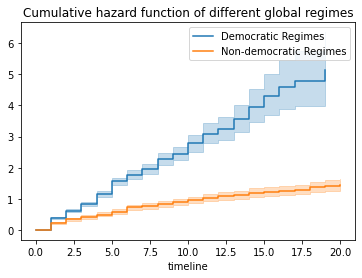

In [15]:
import pylab

dem = (data["democracy"] == "Democracy")

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_cumulative_hazard(loc=slice(0, 20))

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_cumulative_hazard(ax=ax, loc=slice(0, 20))

pylab.title("Cumulative hazard function of different global regimes");

/Users/arjunchandrasekhar/opt/anaconda3/envs/cmpinf2120/lib/python3.9/site-packages/lifelines/fitters/nelson_aalen_fitter.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.ci_labels[0]: hazard_ * np.exp(z * std_hazard_ / hazard_),
/Users/arjunchandrasekhar/opt/anaconda3/envs/cmpinf2120/lib/python3.9/site-packages/lifelines/fitters/nelson_aalen_fitter.py:236: RuntimeWarning: invalid value encountered in true_divide
  self.ci_labels[1]: hazard_ * np.exp(-z * std_hazard_ / hazard_),


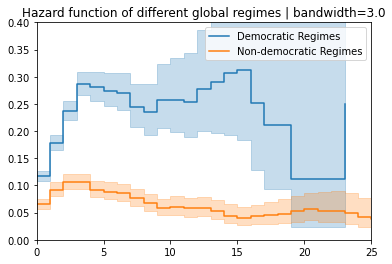

In [16]:
bandwidth = 3

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

pylab.title("Hazard function of different global regimes | bandwidth=%.1f" % bandwidth);
pylab.ylim(0, 0.4)
pylab.xlim(0, 25);

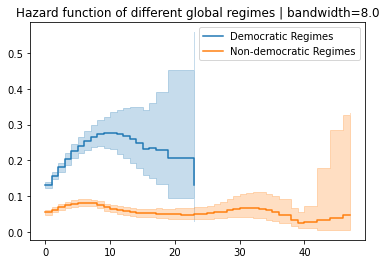

In [17]:
bandwidth = 8.0

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

pylab.title("Hazard function of different global regimes | bandwidth=%.1f" % bandwidth);